# Evaluate the WGANGP Model

reload the WGANGP model and its training history and evaluate

## Import modules

In [1]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from wgangp_model import (
    load_generator,
    generate_synthetic_data,
    inverse_transform_synthetic_data,
)

2025-03-19 13:00:17.648539: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 13:00:17.719432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-19 13:00:17.749563: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-19 13:00:17.758939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 13:00:17.808791: I tensorflow/core/platform/cpu_feature_guar

## Set dynamic GPU memory growth

In [2]:
# Check if GPU available
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is available and set to memory growth mode.")
    except RuntimeError as e:
        print(e)
else:
    print("No GPU detected by TensorFlow.")

GPU is available and set to memory growth mode.


I0000 00:00:1742385620.482587   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1742385620.513419   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1742385620.514528   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


## Load dataset


In [3]:
df_path = "datasets/core_shell_particles_raw_122500.h5"
df_input = pd.read_hdf(df_path)
df_input = df_input.drop(columns=["wavelength", "Q_sca", "Q_back", "Q_fwd"], axis=1)
df_input

,mat_core,mat_shell,r_core,r_shell
0,Si,Si,1,2
1,Si,SiO2,1,2
2,Si,Au,1,2
3,Si,Ag,1,2
4,Si,Si3N4,1,2
...,...,...,...,...
122495,TiO2,Au,100,200
122496,TiO2,Ag,100,200
122497,TiO2,Si3N4,100,200
122498,TiO2,ZrO2,100,200


## Load preprocessed data

In [4]:
hdf5_file_name = "datasets/core_shell_particles_preprocessed_122500.h5"

# Open the HDF5 file
f = h5py.File(hdf5_file_name, "r")
X_train = np.array(f["X_train"])
y_train = np.array(f["y_train"])
X_test = np.array(f["X_test"])
y_test = np.array(f["y_test"])
f.close()

# Combine X_train and X_test
X_transformed = np.concatenate((X_train, X_test), axis=0)
print("Shape of X_transformed:", X_transformed.shape)
np.random.seed(42)
np.random.shuffle(X_transformed)
X_transformed

Shape of X_transformed: (122500, 16)


array([[ 0.2929293 ,  0.47474748,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.6262626 ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.47474748,  0.03030303,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.93939394,  0.27272728,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.5555556 , -0.6969697 ,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.25252524,  0.27272728,  0.        , ...,  0.        ,
         1.        ,  0.        ]], dtype=float32)

## Load Preprocessor

In [5]:
# Load the preprocessors and scalers
preprocessor_path = "datasets/scaler_particle_geometries.pkl"
scaler_Qfwd_path = "datasets/scaler_Qfwd.pkl"
scaler_Qback_path = "datasets/scaler_Qback.pkl"

# Load the preprocessors and scalers
with open(preprocessor_path, "rb") as f:
    preprocessor = pickle.load(f)
with open(scaler_Qfwd_path, "rb") as f:
    scaler_Qfwd = pickle.load(f)
with open(scaler_Qback_path, "rb") as f:
    scaler_Qback = pickle.load(f)

## Load Generator and generate samples

In [6]:
# Load the pre-trained generator
generator = load_generator("models/wgangp_generator.h5")

# Generate synthetic data
num_samples = 10000
latent_dim = 128
synthetic_data = generate_synthetic_data(generator, latent_dim, num_samples)
synthetic_data

I0000 00:00:1742385633.847594   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1742385633.848693   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1742385633.849598   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1742385633.969694   71108 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

[<tf.Tensor: shape=(10000, 2), dtype=float32, numpy=
 array([[ 0.4770829 ,  0.1954924 ],
        [ 0.38880047,  0.12887028],
        [ 0.84449285,  0.582358  ],
        ...,
        [-0.2824027 , -0.50134057],
        [ 0.6302455 ,  0.30188152],
        [ 0.38769236,  0.30680543]], dtype=float32)>,
 <tf.Tensor: shape=(10000, 7), dtype=float32, numpy=
 array([[2.93307011e-07, 1.96622888e-04, 1.44573189e-02, ...,
         4.77441549e-02, 1.16659081e-04, 9.37484980e-01],
        [1.05696490e-04, 1.10182713e-03, 2.14856409e-04, ...,
         4.08226406e-05, 3.69511217e-01, 4.77224065e-04],
        [1.23046907e-02, 5.02288947e-03, 6.06908907e-05, ...,
         5.88244200e-01, 2.88846232e-02, 2.00653430e-02],
        ...,
        [7.21269018e-08, 1.11918723e-08, 9.99886274e-01, ...,
         1.45551468e-07, 1.24601655e-07, 1.13253875e-04],
        [7.64234665e-06, 7.30625834e-06, 1.03178281e-04, ...,
         6.62292987e-02, 9.91095362e-07, 9.33651567e-01],
        [6.18871081e-06, 5.2509719

In [7]:
# Inverse transform synthetic data to the original scale
synthetic_data_original_scale = inverse_transform_synthetic_data(
    preprocessor, synthetic_data
)
synthetic_data_original_scale

array([[74.1156005859375, 120.35374450683594, 'TiO2', 'Si3N4'],
       [69.7456283569336, 113.7581558227539, 'Ag', 'Si3N4'],
       [92.3023910522461, 158.6534423828125, 'Si3N4', 'Ag'],
       ...,
       [36.52106857299805, 51.367286682128906, 'Au', 'ZrO2'],
       [81.69715118408203, 130.8862762451172, 'TiO2', 'ZrO2'],
       [69.6907730102539, 131.3737335205078, 'SiO2', 'ZrO2']],
      dtype=object)

In [8]:
# Define the desired column order
desired_columns = ["mat_core", "mat_shell", "r_core", "r_shell"]
generated_columns = ["r_core", "r_shell", "mat_core", "mat_shell"]

# Convert synthetic data to a DataFrame
synthetic_df = pd.DataFrame(synthetic_data_original_scale, columns=generated_columns)

# Reorder columns according to the desired order
synthetic_df = synthetic_df[desired_columns]
synthetic_df

,mat_core,mat_shell,r_core,r_shell
0,TiO2,Si3N4,74.115601,120.353745
1,Ag,Si3N4,69.745628,113.758156
2,Si3N4,Ag,92.302391,158.653442
3,SiO2,ZrO2,45.925495,126.473709
4,Si,Si,56.487568,78.179848
...,...,...,...,...
9995,ZrO2,Au,76.545723,126.321701
9996,Ag,ZrO2,74.328667,54.113621
9997,Au,ZrO2,36.521069,51.367287
9998,TiO2,ZrO2,81.697151,130.886276


## Plotting
---

### Real Data

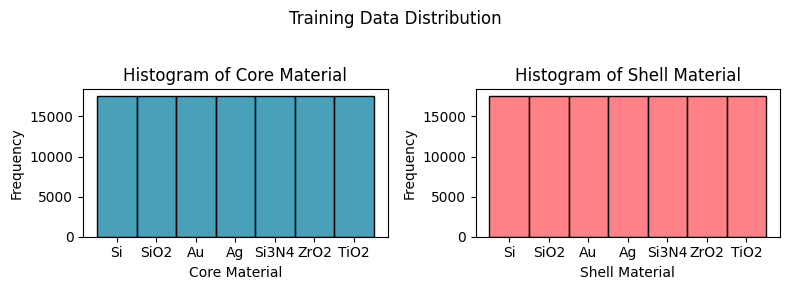

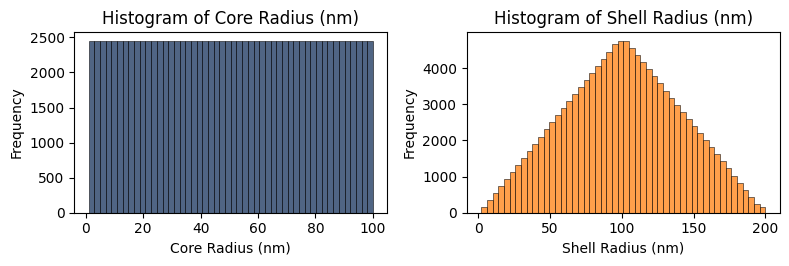

In [9]:
# Plotting histograms
fig1, axs1 = plt.subplots(1, 2, figsize=(8, 3))  # Adjust the layout and size as needed
fig1.suptitle("Training Data Distribution")

# Core Material
sns.histplot(
    df_input["mat_core"], bins=30, color="#0b81a2ff", edgecolor="black", ax=axs1[0]
)
axs1[0].set_title("Histogram of Core Material")
axs1[0].set_xlabel("Core Material")
axs1[0].set_ylabel("Frequency")

# Shell Material
sns.histplot(
    df_input["mat_shell"], bins=30, color="#ff5a5eff", edgecolor="black", ax=axs1[1]
)
axs1[1].set_title("Histogram of Shell Material")
axs1[1].set_xlabel("Shell Material")
axs1[1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting histograms for numerical features
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 3))

# Core Radius (nm)
sns.histplot(
    df_input["r_core"], bins=50, color="#16325bff", edgecolor="black", ax=axs2[0]
)
axs2[0].set_title("Histogram of Core Radius (nm)")
axs2[0].set_xlabel("Core Radius (nm)")
axs2[0].set_ylabel("Frequency")

# Shell Radius (nm)
sns.histplot(
    df_input["r_shell"], bins=50, color="#ff7f0eff", edgecolor="black", ax=axs2[1]
)
axs2[1].set_title("Histogram of Shell Radius (nm)")
axs2[1].set_xlabel("Shell Radius (nm)")
axs2[1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### <u> Synthetic Data </u>

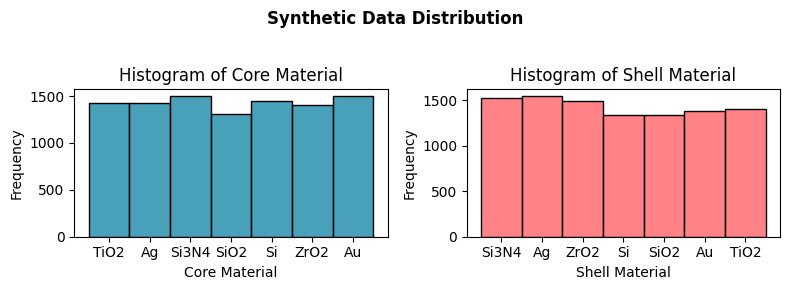

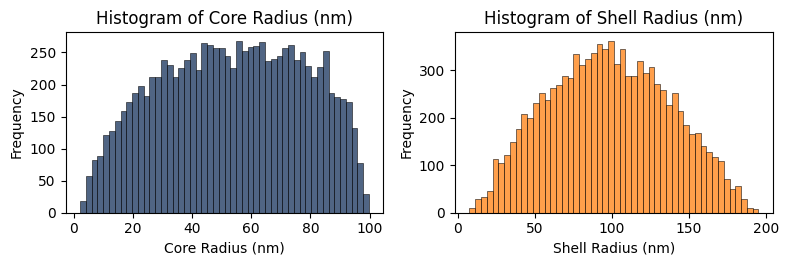

In [10]:
# Plotting histograms
fig1, axs1 = plt.subplots(1, 2, figsize=(8, 3))
fig1.suptitle("Synthetic Data Distribution", fontweight="bold")

# Core Material
sns.histplot(
    synthetic_df["mat_core"], bins=30, color="#0b81a2ff", edgecolor="black", ax=axs1[0]
)
axs1[0].set_title("Histogram of Core Material")
axs1[0].set_xlabel("Core Material")
axs1[0].set_ylabel("Frequency")

# Shell Material
sns.histplot(
    synthetic_df["mat_shell"], bins=30, color="#ff5a5eff", edgecolor="black", ax=axs1[1]
)
axs1[1].set_title("Histogram of Shell Material")
axs1[1].set_xlabel("Shell Material")
axs1[1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plotting histograms for numerical features
fig2, axs2 = plt.subplots(1, 2, figsize=(8, 3))

# Core Radius (nm)
sns.histplot(
    synthetic_df["r_core"], bins=50, color="#16325bff", edgecolor="black", ax=axs2[0]
)
axs2[0].set_title("Histogram of Core Radius (nm)")
axs2[0].set_xlabel("Core Radius (nm)")
axs2[0].set_ylabel("Frequency")

# Shell Radius (nm)
sns.histplot(
    synthetic_df["r_shell"], bins=50, color="#ff7f0eff", edgecolor="black", ax=axs2[1]
)
axs2[1].set_title("Histogram of Shell Radius (nm)")
axs2[1].set_xlabel("Shell Radius (nm)")
axs2[1].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Pairwise scatter Plot


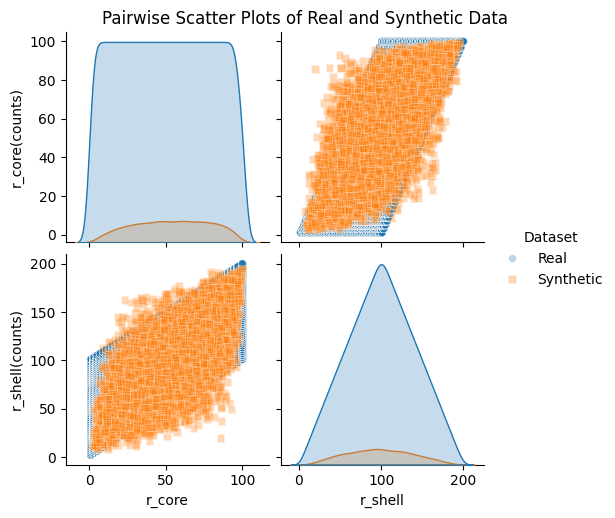

In [27]:
# Add a column to distinguish between real and synthetic data
df_input["Dataset"] = "Real"
synthetic_df["Dataset"] = "Synthetic"

combined_df = pd.concat([df_input, synthetic_df], ignore_index=True)
pairplot = sns.pairplot(
    combined_df, hue="Dataset", markers=["o", "s"], plot_kws={"alpha": 0.3, "s": 30}
)
pairplot.fig.suptitle("Pairwise Scatter Plots of Real and Synthetic Data", y=1.02)

y_labels = ["r_core(counts)", "r_shell(counts)"]
for i, ax in enumerate(pairplot.axes[:, 0]):  # choose first column and set y-axis label
    if i < len(y_labels):
        ax.set_ylabel(y_labels[i])
plt.show()